In [104]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plot  
import seaborn as sns  
import plotly.express as px





In [31]:

data = pd.read_csv("Unemployment in India.csv")  
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [33]:
data.tail()  

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [35]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [45]:

data.dropna(axis = 0, inplace = True)  


In [46]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

<Axes: >

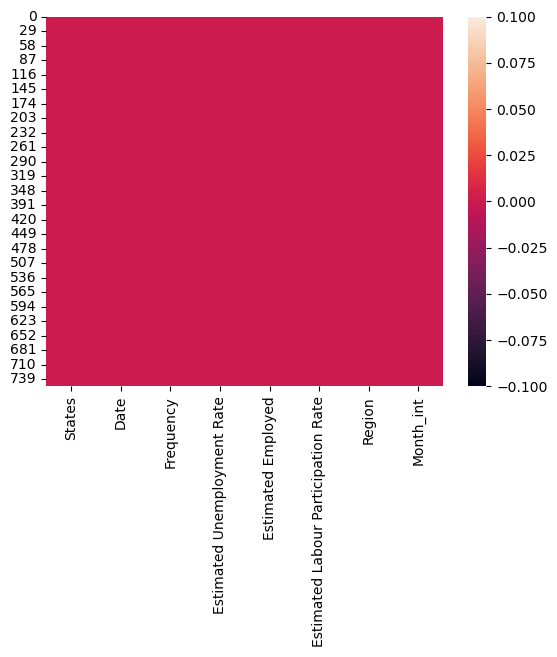

In [105]:
sns.heatmap(data.isnull(), cbar=True)



In [53]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [55]:
data.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


In [57]:
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']  

In [66]:
data['Frequency'] = data['Frequency'].astype('category')
data['Region'] = data['Region'].astype('category')


In [72]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Month'] = data['Date'].dt.month
data['Month_int'] = data['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [75]:
data.drop(columns='Month', inplace=True)

In [74]:
df_ld = data.copy()

In [78]:
df=data.dropna()

In [79]:
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

df = df.loc[mask]

In [81]:
mask = (df_ld['Date'] >= '2020-04-30')

df_ld = df_ld.loc[mask]

C:\Users\DHAKR\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DHAKR\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


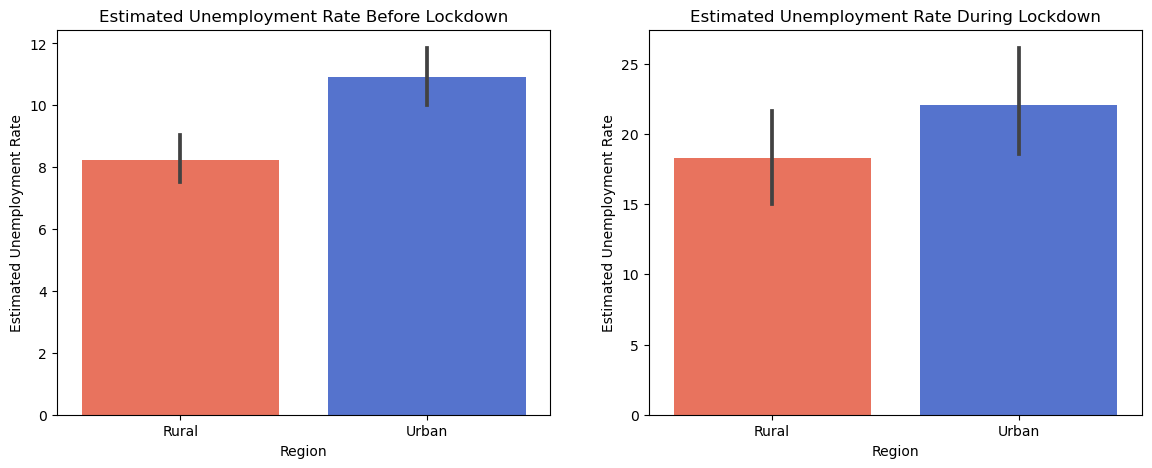

In [110]:

colors = ['#FF6347', '#4169E1', '#32CD32', '#FFD700', '#9370DB']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)

sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df, palette=colors)

plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

plt.subplot(1, 2, 2)

sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld, palette=colors)

plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

plt.show()


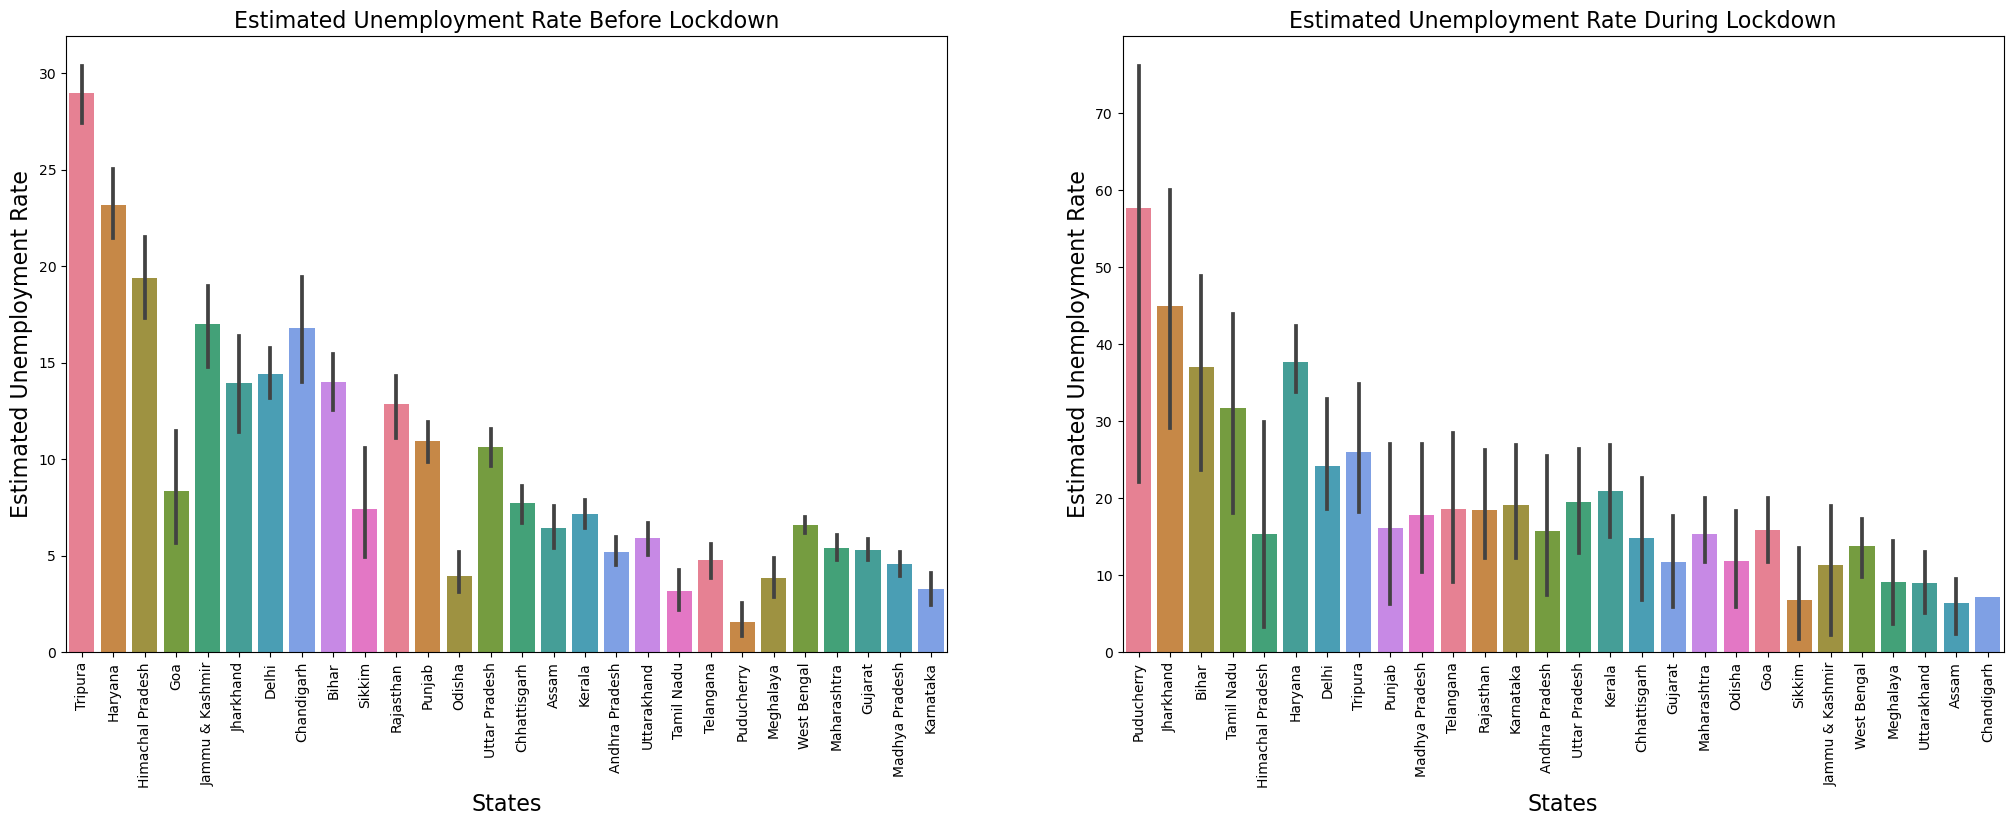

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("husl", 10)

plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)

plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate", palette=colors)
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

plt.subplot(1, 2, 2)

plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate", palette=colors)
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

plt.show()


<Axes: ylabel='count'>

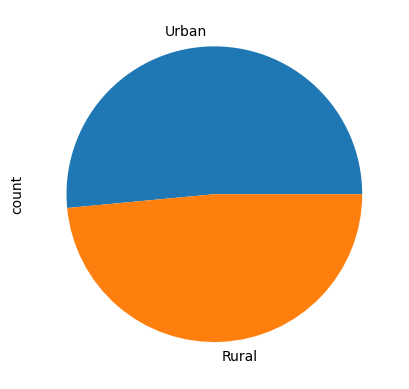

In [107]:
data['Region'].value_counts().plot.pie()

In [99]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


C:\Users\DHAKR\AppData\Local\Temp\ipykernel_12632\3897874411.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_unemployment_2019 = df_2019.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
C:\Users\DHAKR\AppData\Local\Temp\ipykernel_12632\3897874411.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_unemployment_2020 = df_2020.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
C:\Users\DHAKR\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

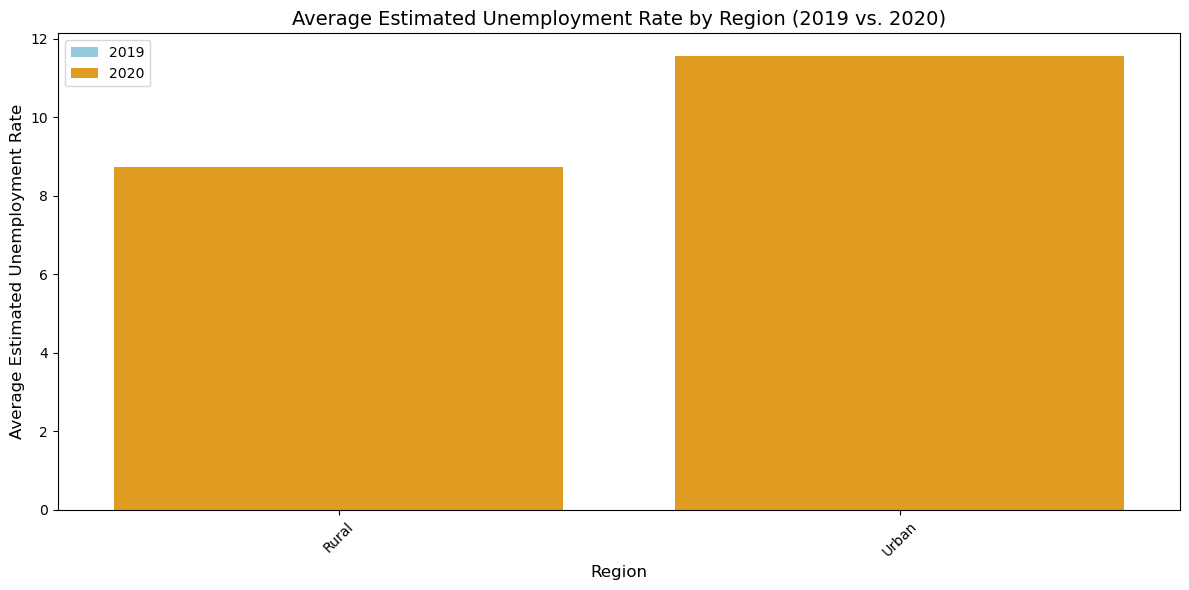

In [111]:

df_2019 = df[df['Date'].dt.year == 2019]
df_2020 = df[df['Date'].dt.year == 2020]

avg_unemployment_2019 = df_2019.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

avg_unemployment_comparison = avg_unemployment_2019.merge(avg_unemployment_2020, on='Region', suffixes=('_2019', '_2020'))

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate_2019', data=avg_unemployment_comparison, color='skyblue', label='2019')
sns.barplot(x='Region', y='Estimated Unemployment Rate_2020', data=avg_unemployment_comparison, color='orange', label='2020')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Estimated Unemployment Rate', fontsize=12)
plt.title('Average Estimated Unemployment Rate by Region (2019 vs. 2020)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


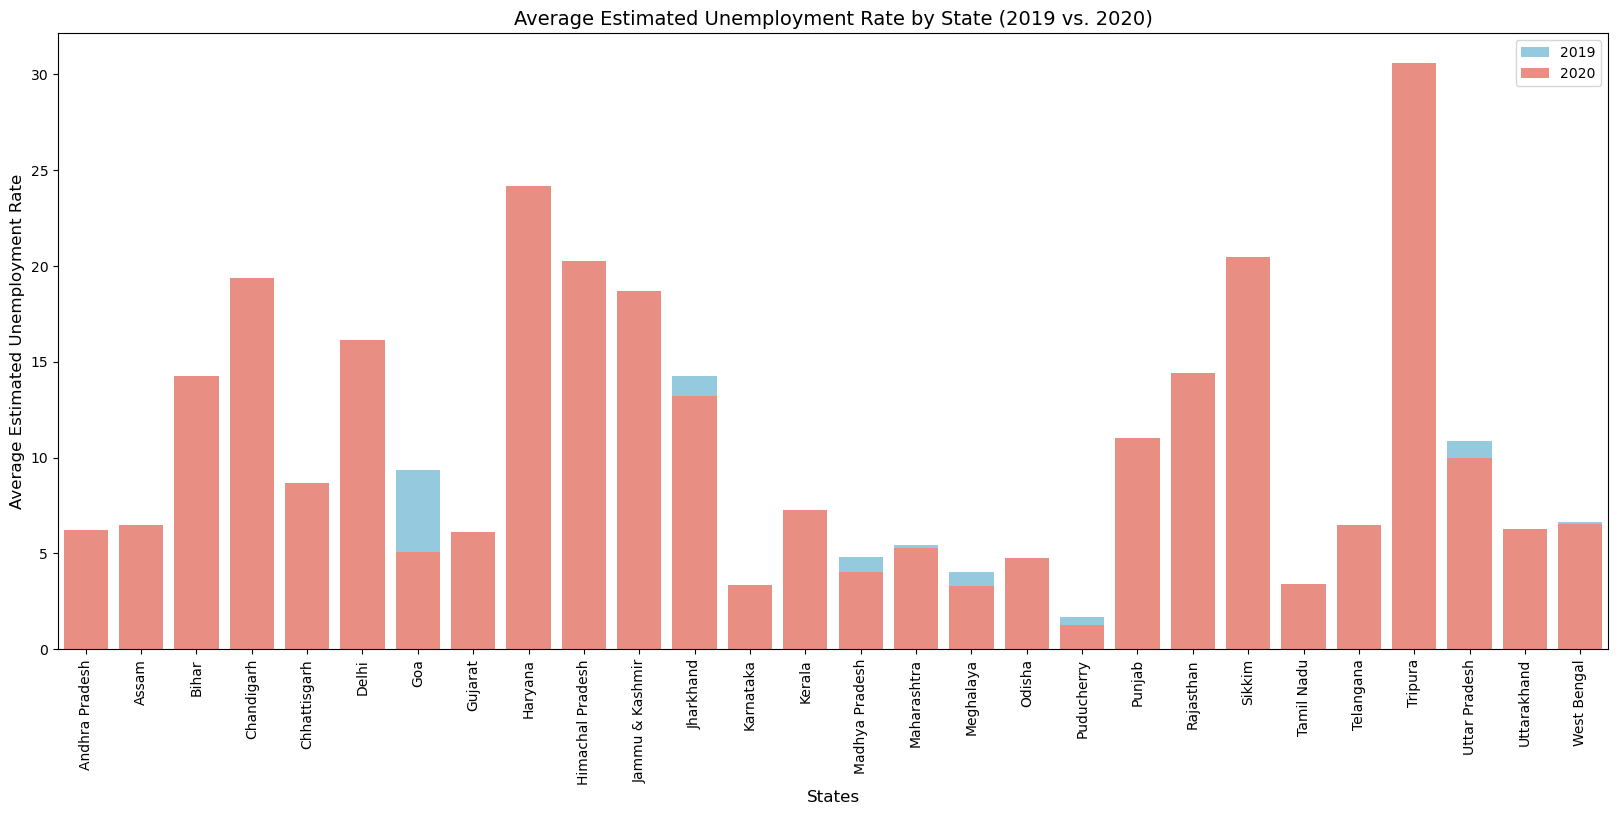

In [114]:

df_2019 = df[df['Date'].dt.year == 2019]
df_2020 = df[df['Date'].dt.year == 2020]


df_2019_avg = df_2019.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
df_2020_avg = df_2020.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


df_avg_comparison = pd.merge(df_2019_avg, df_2020_avg, on='States', suffixes=('_2019', '_2020'))


plt.figure(figsize=(20, 8))
sns.barplot(x='States', y='Estimated Unemployment Rate_2019', data=df_avg_comparison, color='skyblue', label='2019')
sns.barplot(x='States', y='Estimated Unemployment Rate_2020', data=df_avg_comparison, color='salmon', label='2020')
plt.xlabel('States', fontsize=12)
plt.ylabel('Average Estimated Unemployment Rate', fontsize=12)
plt.title('Average Estimated Unemployment Rate by State (2019 vs. 2020)', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [120]:
avg_unemployment_2019 = df_2019.groupby('States')['Estimated Labour Participation Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('States')['Estimated Labour Participation Rate'].mean().reset_index()

comparison_df = avg_unemployment_2019.merge(avg_unemployment_2020, on='States', suffixes=('_2019', '_2020'))

comparison_df = comparison_df.rename(columns={'Estimated Labour Participation Rate_2019': 'Avg Labour Participation Rate 2019',
                                              'Estimated Labour Participation Rate_2020': 'Avg Labour Participation Rate 2020'})

comparison_df


,States,Avg Labour Participation Rate 2019,Avg Labour Participation Rate 2020
0,Andhra Pradesh,40.095000,39.296667
1,Assam,46.140667,45.645000
2,Bihar,38.625000,37.975000
3,Chandigarh,39.921250,39.623333
4,Chhattisgarh,44.908750,45.466667
5,Delhi,41.438750,41.123333
6,Goa,39.686250,36.640000
7,Gujarat,47.681875,48.501667
8,Haryana,43.208125,42.051667
9,Himachal Pradesh,46.945625,46.035000


In [140]:

avg_unemployment_2019 = df_2019.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

comparison_df = avg_unemployment_2019.merge(avg_unemployment_2020, on='States', suffixes=('_2019', '_2020'))

comparison_df = comparison_df.rename(columns={'Estimated Unemployment Rate_2019': 'Avg Unemployment Rate 2019',
                                              'Estimated Unemployment Rate_2020': 'Avg Unemployment Rate 2020'})

display(comparison_df)


,Avg Unemployment Rate 2019,States,Avg Unemployment Rate 2020


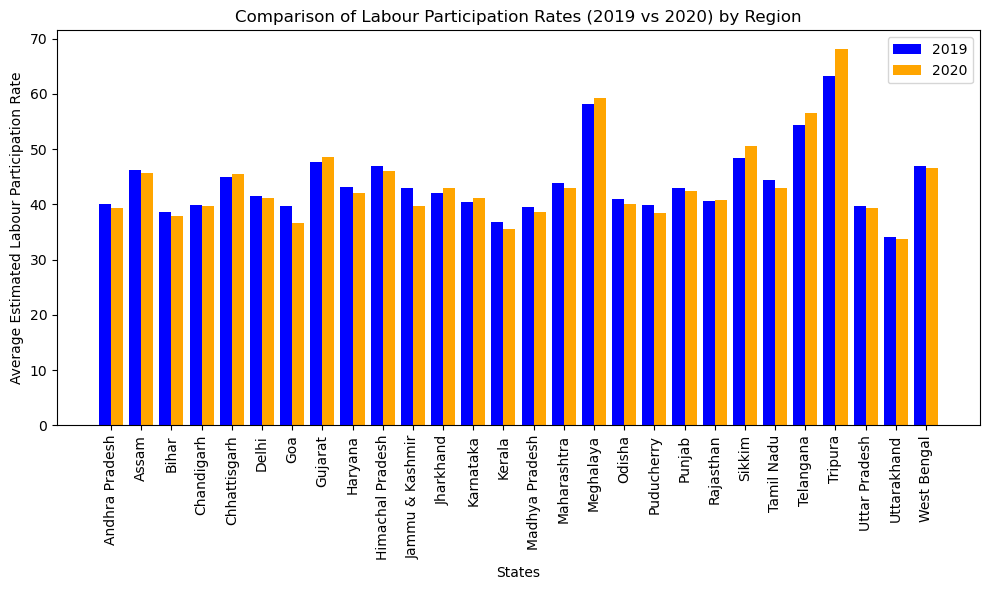

In [133]:



x = np.arange(len(comparison_df['States']))
width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, comparison_df['Avg Labour Participation Rate 2019'], width, label='2019', color='blue')
plt.bar(x + width/2, comparison_df['Avg Labour Participation Rate 2020'], width, label='2020', color='orange')

plt.xlabel('States')
plt.ylabel('Average Estimated Labour Participation Rate')
plt.title('Comparison of Labour Participation Rates (2019 vs 2020) by Region')
plt.xticks(x, comparison_df['States'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

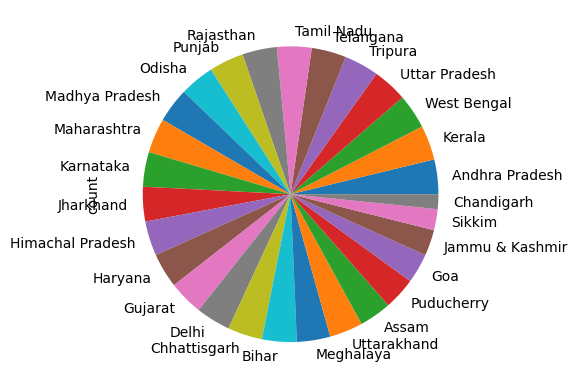

In [143]:
data['States'].value_counts().plot.pie()